## YOLO For Objects Detection: 
#### Comparison Between Tiny Yolo and Yolo over Hexagon Dataset

In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

#To show this as svg images
%config InlineBackend.figure_format = 'svg'

#### Helping Function to Draw the Predicted area over the Images of YOLO Network

In [2]:
def DrawBox(original_img, predictions,conf):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > conf:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

## Yolo Network

In [3]:
options = {
    'model': 'cfg/yoloCustom.cfg',
    'load': 125,                             # 750 is the step number. Can be found in the ckpt folder
    'threshold': 0.05,                       # this number can be higher if the performance is better
    'gpu': 1.0                               # Dont use this if you have no gpu
}

tfnet = TFNet(options)

Parsing cfg/yoloCustom.cfg
Loading None ...
Finished in 0.0005843639373779297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76

## Yolo Network Predictions: 

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# read the color image and covert to RGB
img = cv2.imread('train/Images/test-05.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use the Yolo model to predict the selected image
result = tfnet.return_predict(img)

#### Result of Yolo Model Predictions with the confidence level of every box

In [5]:
result

[{'label': 'damage',
  'confidence': 0.39819828,
  'topleft': {'x': 5, 'y': 4},
  'bottomright': {'x': 18, 'y': 16}},
 {'label': 'damage',
  'confidence': 0.40956965,
  'topleft': {'x': 0, 'y': 0},
  'bottomright': {'x': 32, 'y': 30}},
 {'label': 'damage',
  'confidence': 0.37170023,
  'topleft': {'x': 31, 'y': 4},
  'bottomright': {'x': 44, 'y': 15}},
 {'label': 'damage',
  'confidence': 0.38531443,
  'topleft': {'x': 18, 'y': 0},
  'bottomright': {'x': 60, 'y': 34}},
 {'label': 'damage',
  'confidence': 0.44196722,
  'topleft': {'x': 0, 'y': 0},
  'bottomright': {'x': 85, 'y': 68}},
 {'label': 'damage',
  'confidence': 0.35493055,
  'topleft': {'x': 57, 'y': 4},
  'bottomright': {'x': 70, 'y': 16}},
 {'label': 'damage',
  'confidence': 0.38504335,
  'topleft': {'x': 44, 'y': 0},
  'bottomright': {'x': 86, 'y': 32}},
 {'label': 'damage',
  'confidence': 0.3453182,
  'topleft': {'x': 84, 'y': 4},
  'bottomright': {'x': 97, 'y': 17}},
 {'label': 'damage',
  'confidence': 0.39171794,
  '

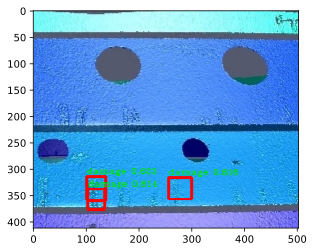

In [6]:
_, ax = plt.subplots()
ax.imshow(DrawBox(img, result,0.6))

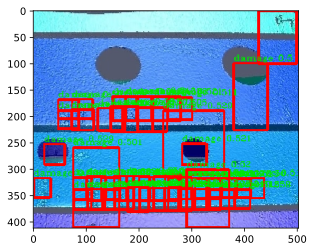

In [7]:
_, ax = plt.subplots()
ax.imshow(DrawBox(img, result,0.5))

## Tiny Yolo Network

In [8]:
options = {
    'model': 'cfg/tiny-yolo-vocCustom.cfg',
    'load': 600,                             # 750 is the step number. Can be found in the ckpt folder
    'threshold': 0.05,                       # this number can be higher if the performance is better
    'gpu': 1.0                               # Dont use this if you have no gpu
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-vocCustom.cfg
Loading None ...
Finished in 8.535385131835938e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 

In [9]:
# read the color image and covert to RGB
img = cv2.imread('train/Images/test-05.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use the model to predict the image
result = tfnet.return_predict(img)

img.shape

(412, 503, 3)

## Tiny Yolo Network Predictions:

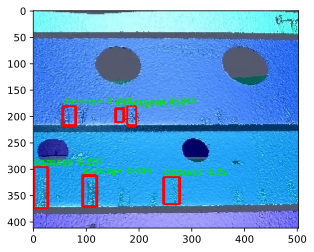

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.imshow(DrawBox(img, result,0.5))

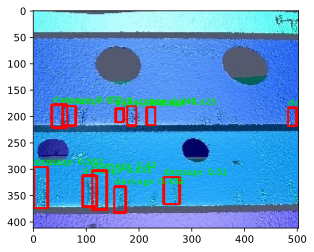

In [11]:
_, ax = plt.subplots()
ax.imshow(DrawBox(img, result,0.4))